<a href="https://colab.research.google.com/github/911leonardo/exerciciosuniara/blob/main/atividadeaula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # Importa a biblioteca NumPy para operações matemáticas e manipulação de arrays
import tensorflow as tf  # Importa TensorFlow para criação e treinamento de modelos de aprendizado de máquina
from tensorflow.keras import layers, Sequential  # Importa camadas e o modelo Sequential da API Keras do TensorFlow

def build_generator():  # Define uma função para criar e retornar um modelo gerador
    model = Sequential([  # Cria um modelo sequencial
        layers.Dense(16, activation='relu', input_dim=1),  # Adiciona uma camada densa com 16 neurônios, ativação ReLU e entrada de dimensão 1
        layers.Dense(1)  # Adiciona uma camada densa com 1 neurônio, sem ativação (camada de saída)
    ])
    return model  # Retorna o modelo gerador

def build_discriminator():  # Define uma função para criar e retornar um modelo discriminador
    model = Sequential([  # Cria um modelo sequencial
        layers.Dense(16, activation='relu', input_dim=1),  # Adiciona uma camada densa com 16 neurônios, ativação ReLU e entrada de dimensão 1
        layers.Dense(1, activation='sigmoid')  # Adiciona uma camada densa com 1 neurônio e ativação sigmoide (para saída entre 0 e 1)
    ])
    return model  # Retorna o modelo discriminador

generator = build_generator()  # Cria uma instância do gerador usando a função build_generator
discriminator = build_discriminator()  # Cria uma instância do discriminador usando a função build_discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy')  # Compila o discriminador com otimizador Adam e perda de entropia cruzada binária

# Conectando o gerador ao discriminador
discriminator.trainable = False  # Define o discriminador como não treinável durante o treinamento do GAN
gan = Sequential([generator, discriminator])  # Cria um modelo GAN que empilha o gerador e o discriminador
gan.compile(optimizer='adam', loss='binary_crossentropy')  # Compila o GAN com otimizador Adam e perda de entropia cruzada binária

real_data = np.array([[6.0], [7.0], [8.0]])  # Cria um array de dados reais
labels_real = np.ones((3, 1))  # Rótulos para dados reais (1)
labels_fake = np.zeros((3, 1)) # Rótulos para dados falsos (0)

epochs = 10  # Define o número de épocas para o treinamento
batch_size = 3  # Define o tamanho do lote (batch size) para o treinamento

for epoch in range(epochs): # Loop para treinamento por número de épocas
    # Gerando dados falsos (números)
    noise = np.random.normal(0, 1, (batch_size, 1))  # Gera ruído normal (dados falsos) para o gerador
    generated_data = generator.predict(noise)  # Usa o gerador para criar dados falsos

    # Treinando o discriminador com dados reais e falsos
    d_loss_real = discriminator.train_on_batch(real_data, labels_real)  # Treina o discriminador com dados reais
    d_loss_fake = discriminator.train_on_batch(generated_data, labels_fake)  # Treina o discriminador com dados falsos

    # Treinando o gerador (enganar o discriminador)
    noise = np.random.normal(0, 1, (batch_size, 1))  # Gera novo ruído normal para o treinamento do gerador
    gan_loss = gan.train_on_batch(noise, labels_real)  # Treina o GAN (gerador) para enganar o discriminador

    if epoch % 100 == 0:  # A cada 100 épocas, imprime os valores de perda
        print(f"Epoch {epoch}, Loss D Real: {d_loss_real}, Loss D Fake: {d_loss_fake}, Loss G: {gan_loss}")


noise = np.random.normal(0, 1, (5, 1))  # Gera ruído normal para a geração de novos dados
generated_numbers = generator.predict(noise)  # Usa o gerador para criar novos números
print("Números gerados:", generated_numbers)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Epoch 0, Loss D Real: 1.2557803392410278, Loss D Fake: 0.9768766760826111, Loss G: [array(0.9768767, dtype=float32), array(0.9768767, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Números gerados: [[-0.06852897]
 [-0.07957903]
 [-0.1284689 ]
 [-0.10078298]
 [-0.07415736]]


In [ ]:
Neste exemplo, usaremos o conjunto de dados MNIST, que contém imagens de dígitos manuscritos, para treinar a GAN a gerar imagens semelhantes.

Passos do Código:
Construir o Gerador e o Discriminador.
Definir o Modelo GAN.
Treinar a GAN.
Gerar e Visualizar Imagens.

SyntaxError: invalid syntax (<ipython-input-2-a49c62eff1b0>, line 1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
Epoch 0, D Loss Real: 0.1287311166524887, D Loss Fake: 0.42250168323516846, G Loss: [array(0.42250168, dtype=float32), array(0.42250168, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


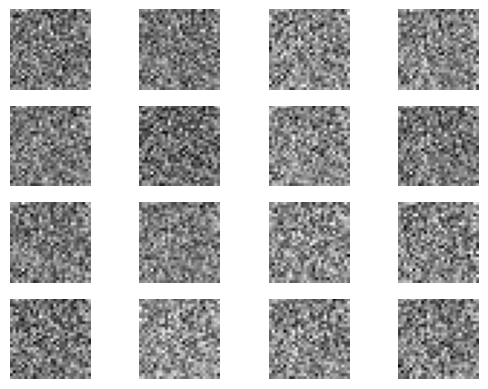

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━

In [ ]:
# Importar bibliotecas necessárias
import numpy as np  # Biblioteca para operações matemáticas e manipulação de arrays
import matplotlib.pyplot as plt  # Biblioteca para visualização de gráficos
import tensorflow as tf  # Biblioteca principal para machine learning
from tensorflow.keras import layers, Sequential  # Importar classes para construir redes neurais
from tensorflow.keras.datasets import mnist  # Importar o conjunto de dados MNIST

# Carregar o conjunto de dados MNIST (imagens de dígitos escritos à mão)
(x_train, _), (_, _) = mnist.load_data()  # Carrega os dados de treino e teste (não usa os rótulos)
x_train = (x_train - 127.5) / 127.5  # Normalizar as imagens para o intervalo [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)  # Adicionar uma dimensão para o canal de cor (grayscale)

# Definir parâmetros para treinamento
batch_size = 64  # Tamanho do lote para o treinamento
epochs = 100  # Número de épocas para o treinamento
latent_dim = 100  # Dimensão do vetor de entrada para o gerador

# Construir o Gerador
def build_generator():
    model = Sequential([
        layers.Dense(256, activation='relu', input_dim=latent_dim),  # Camada densa com 256 unidades e ReLU
        layers.BatchNormalization(),  # Normalização em lote para estabilizar o treinamento
        layers.Dense(512, activation='relu'),  # Camada densa com 512 unidades e ReLU
        layers.BatchNormalization(),  # Normalização em lote
        layers.Dense(1024, activation='relu'),  # Camada densa com 1024 unidades e ReLU
        layers.BatchNormalization(),  # Normalização em lote
        layers.Dense(28 * 28 * 1, activation='tanh'),  # Camada densa com ativação tanh para gerar imagens
        layers.Reshape((28, 28, 1))  # Remodelar a saída para a forma de uma imagem 28x28 com 1 canal
    ])
    return model

# Construir o Discriminador
def build_discriminator():
    model = Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),  # Achatar a imagem 28x28 para um vetor unidimensional
        layers.Dense(512, activation='relu'),  # Camada densa com 512 unidades e ReLU
        layers.Dense(256, activation='relu'),  # Camada densa com 256 unidades e ReLU
        layers.Dense(1, activation='sigmoid')  # Camada densa com ativação sigmoide para saída binária (real ou falso)
    ])
    return model

# Construir o GAN (Generative Adversarial Network)
def build_gan(generator, discriminator):
    discriminator.trainable = False  # O discriminador não será treinado quando o GAN for treinado
    model = Sequential([generator, discriminator])  # O GAN é composto pelo gerador seguido pelo discriminador
    return model

# Instanciar o Gerador e o Discriminador
generator = build_generator()  # Criar o modelo do gerador
discriminator = build_discriminator()  # Criar o modelo do discriminador
discriminator.compile(optimizer='adam', loss='binary_crossentropy')  # Compilar o discriminador com o otimizador Adam e perda binária

# Instanciar o GAN
gan = build_gan(generator, discriminator)  # Criar o modelo GAN
gan.compile(optimizer='adam', loss='binary_crossentropy')  # Compilar o GAN com o otimizador Adam e perda binária

# Treinar o GAN
for epoch in range(epochs):  # Loop de treinamento para o número de épocas especificado
    # Treinar o Discriminador
    idx = np.random.randint(0, x_train.shape[0], batch_size)  # Selecionar um lote aleatório de índices
    real_images = x_train[idx]  # Obter as imagens reais do lote
    real_labels = np.ones((batch_size, 1))  # Rótulos reais são 1

    noise = np.random.normal(0, 1, (batch_size, latent_dim))  # Gerar ruído aleatório para o gerador
    fake_images = generator.predict(noise)  # Gerar imagens falsas com o gerador
    fake_labels = np.zeros((batch_size, 1))  # Rótulos falsos são 0

    # Treinar o discriminador com imagens reais e falsas
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)  # Perda para imagens reais
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)  # Perda para imagens falsas

    # Treinar o Gerador
    noise = np.random.normal(0, 1, (batch_size, latent_dim))  # Gerar ruído aleatório para o gerador
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))  # Treinar o GAN (gerador) para enganar o discriminador

    # Exibir progresso a cada 1000 épocas
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, D Loss Real: {d_loss_real}, D Loss Fake: {d_loss_fake}, G Loss: {g_loss}")
        # Gerar e visualizar imagens
        noise = np.random.normal(0, 1, (16, latent_dim))  # Gerar ruído para gerar imagens
        generated_images = generator.predict(noise)  # Gerar imagens falsas com o gerador
        generated_images = (generated_images + 1) / 2.0  # Reverter a normalização para o intervalo [0, 1]

        # Criar uma grade de subplots para visualizar as imagens geradas
        fig, axs = plt.subplots(4, 4)  # Criar uma grade 4x4 de subplots
        cnt = 0  # Contador para iterar sobre as imagens
        for i in range(4):
            for j in range(4):
                axs[i, j].imshow(generated_images[cnt, :, :, 0], cmap='gray')  # Mostrar a imagem gerada
                axs[i, j].axis('off')  # Desativar os eixos
                cnt += 1
        plt.show()  # Exibir o gráfico

